<a href="https://colab.research.google.com/github/rerebebeccacca/supermarket-sales-analysis/blob/main/notebooks/supermarket_sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Supermarket Sales Data Analysis

###匯入檔案

In [111]:
# 🛒 Supermarket Sales Data Analysis
# Author: rerebebeccacca
# Goal: Clean and analyze supermarket sales data to find business insights

# 1. 匯入必要套件
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. 上傳或讀取資料（Colab 上傳用）
#from google.colab import files
#uploaded = files.upload()

#連接 Google Drive，可使用以下方法讀取：
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/MyDrive/your_path/supermarket_sales.csv')


In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
file_path = '/content/drive/MyDrive/Google data analyst-coursera/supermarket_sale_analysis/SuperMarket Analysis.csv'
# 3. 讀取資料
df = pd.read_csv(file_path)

###Colab 進行matplotlib繪圖時顯示繁體中文

In [114]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-07-17 17:04:45--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.0.78, 2607:f8b0:4025:803::200e
Connecting to drive.google.com (drive.google.com)|172.217.0.78|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-07-17 17:04:45--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.15.225, 2607:f8b0:4025:815::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.15.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  54.8MB/s    in 0.4s    

2025-07-17 17:04:48 (54.8 MB/s

### 初始敘述統計和圖表

In [115]:
# 4. 基本資料概覽
print("前5筆資料：")
display(df.head())

前5筆資料：


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [116]:
print("\n資料摘要：")
print(df.info())
print("\n敘述統計：")
print(df.describe())


資料摘要：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin perce

In [117]:
# 5. 缺失值與重複值檢查
print("\n缺失值統計：")
print(df.isnull().sum())
print("\n重複值筆數：", df.duplicated().sum())


缺失值統計：
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

重複值筆數： 0


In [118]:
# 6. 時間處理（新增 Hour 欄位）
df['Date'] = pd.to_datetime(df['Date'])
display(df.head())
df['Time'] = pd.to_datetime(df['Time'])
display(df.head())
df['Hour'] = df['Time'].dt.hour
display(df.head())

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


/tmp/ipython-input-118-3543666976.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2025-07-17 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2025-07-17 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2025-07-17 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2025-07-17 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2025-07-17 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2025-07-17 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2025-07-17 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2025-07-17 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2025-07-17 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2025-07-17 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10


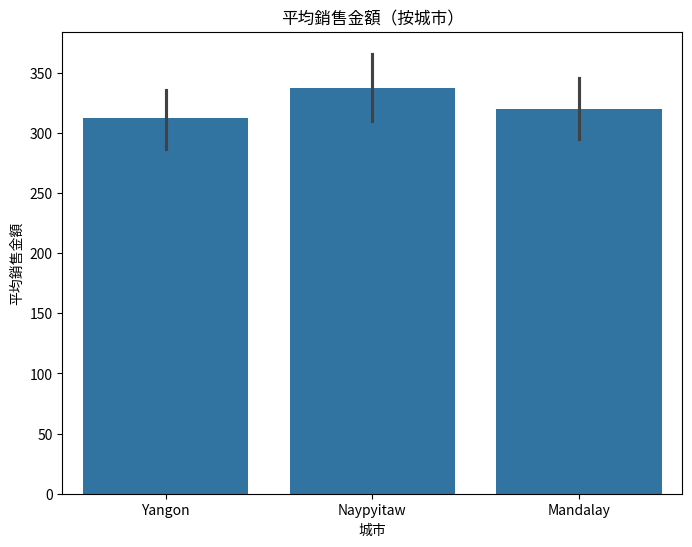

<Figure size 700x700 with 0 Axes>

In [119]:
# 7. 問題分析（城市銷售比較）-比較哪個城市的顧客「平均」花最多錢，對市場策略很有幫助。
plt.figure(figsize=(8,6)) #建立一個寬 8、高 6 吋的圖表畫布
sns.barplot(data = df, x = 'City', y = 'Sales', estimator = 'mean') #繪製「每個城市的平均銷售金額」長條圖
plt.title('平均銷售金額（按城市）') #設定圖表標題
plt.xlabel('城市') #設定x軸標籤
plt.ylabel('平均銷售金額') #設定y軸標籤
plt.show() #顯示圖表
plt.savefig("avg_sales(city)") #存圖表
# Naypyitaw程式的顧客平均花最多錢

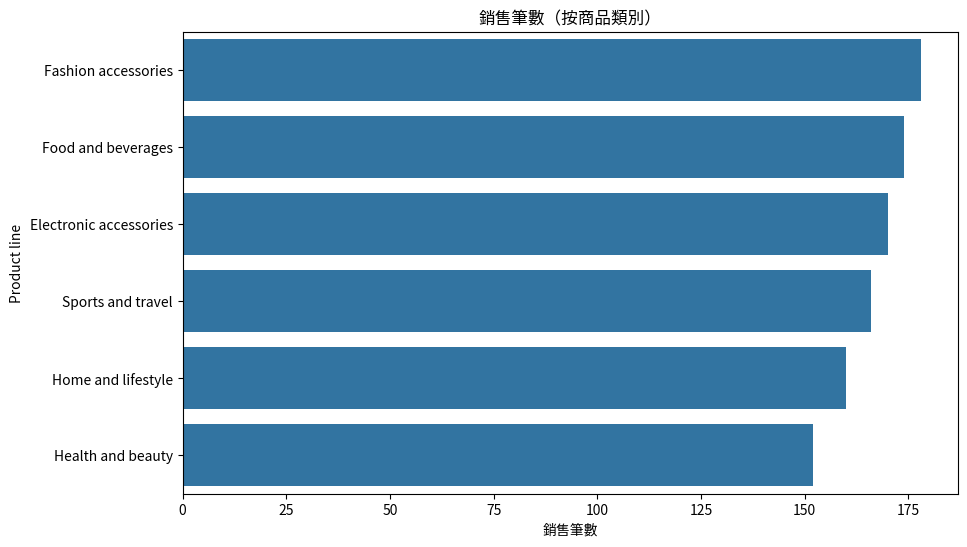

<Figure size 700x700 with 0 Axes>

In [120]:
# 8. 商品類別分布-找出什麼商品賣得最多，未來可建議加強進貨或促銷。
plt.figure(figsize=(10,6))
sns.countplot(data = df, y = 'Product line', order = df['Product line'].value_counts().index)
#繪製「每個商品類別」的銷售次數長條圖,Y 軸是商品類別（如 food、electronics 等),照銷售筆數排序（最多的放最上面）
plt.title('銷售筆數（按商品類別）')
plt.xlabel('銷售筆數') #xlabel(...)	設定 X 軸名稱為「Count」
plt.show()
plt.savefig("order_count(product_type)") #存圖表

# 賣最多的為Fashion accessories

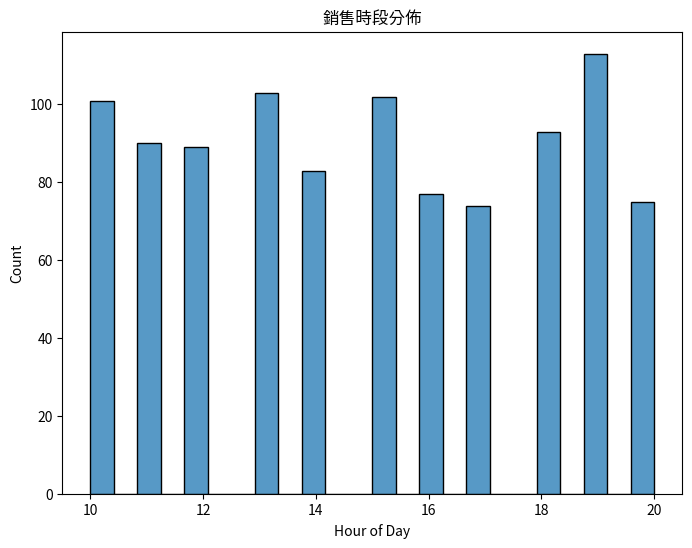

<Figure size 700x700 with 0 Axes>

In [121]:
#9. 銷售時間分析-超市哪個時段生意最好（中午？下班？），幫助排班或促銷策略
plt.figure(figsize=(8,6))
sns.histplot(data = df, x = 'Hour', bins = 24)
#畫出銷售出現的「時間分佈直方圖」,	用之前加的欄位 Hour 表示交易發生的「小時」,bins = 24:分成 24 格（代表 24 小時）
plt.title('銷售時段分佈')
plt.xlabel('Hour of Day')
plt.show()
plt.savefig("order_count_per_hour") #存圖表
# 約晚上七點下班時段銷售最好

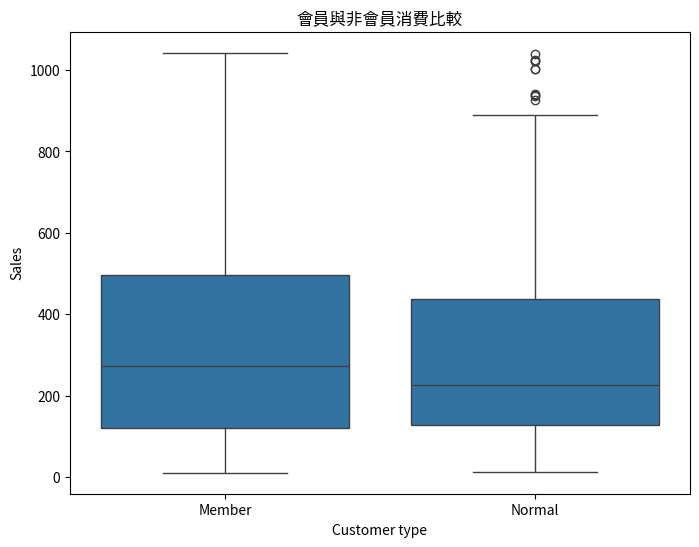

<Figure size 700x700 with 0 Axes>

In [122]:
#10. 顧客類型消費比較-看看是不是「會員」通常會買比較多？這對會員制度設計很有幫助。

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Customer type', y = 'Sales')
plt.title('會員與非會員消費比較')
plt.show()
plt.savefig("memberVSnone_sales_total") #存圖表
#會員消費較多->可能可以改善會員制度增加消費

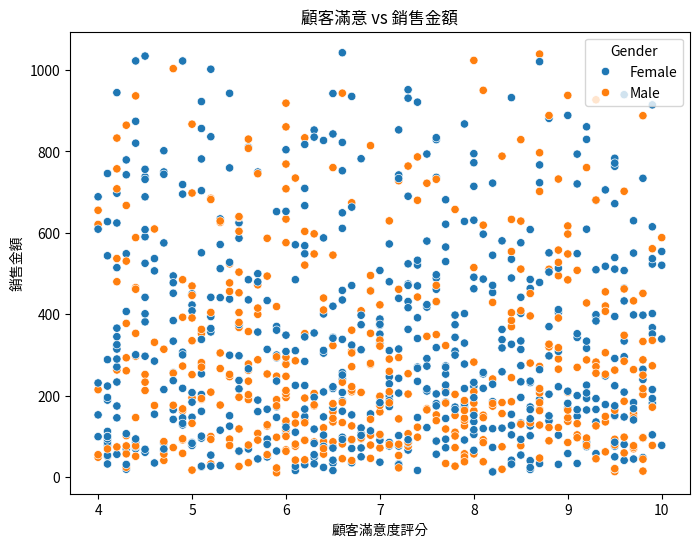

In [123]:
#評分與銷售關係（顧客滿意 vs 銷售金額）

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Rating', y='Sales',hue='Gender')
#散點圖，x 軸是顧客滿意度評分、y 軸是該筆交易金額,hue='Gender'	根據性別分色（男/女），看有無不同趨勢
plt.xlabel('顧客滿意度評分')
plt.ylabel('銷售金額')
plt.title('顧客滿意 vs 銷售金額')
plt.show()


#嘗試找出「越滿意的客人是否也買得越多？做假設驗證分析。

| 圖表類型              | 用途                        |
| ----------------- | ------------------------- |
| **barplot（長條圖）**  | 顯示各類別的「平均值」（可加 estimator） |
| **countplot**     | 顯示各類別的「筆數 / 頻率」           |
| **histplot（直方圖）** | 顯示數值資料的分佈情形               |
| **boxplot**       | 比較數值分佈（中位數、極端值）           |
| **scatterplot**   | 看兩個數值變數之間是否有關聯            |


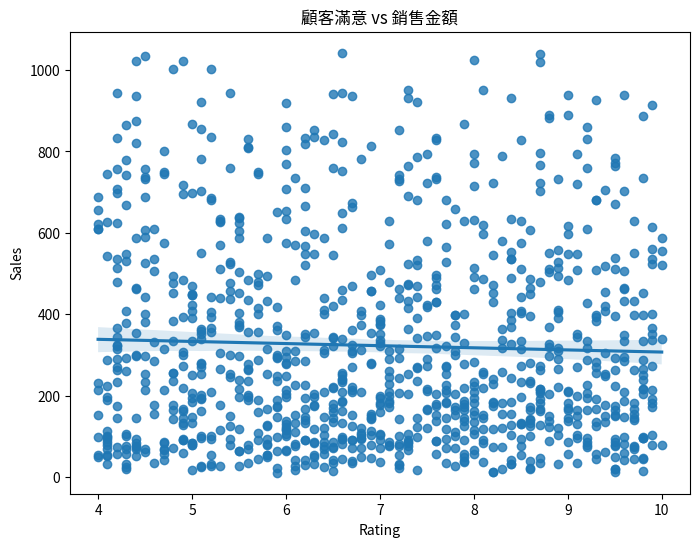

In [124]:
#  加一條線顯示趨勢圖
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='Rating',y='Sales')
plt.title('顧客滿意 vs 銷售金額')
plt.show()

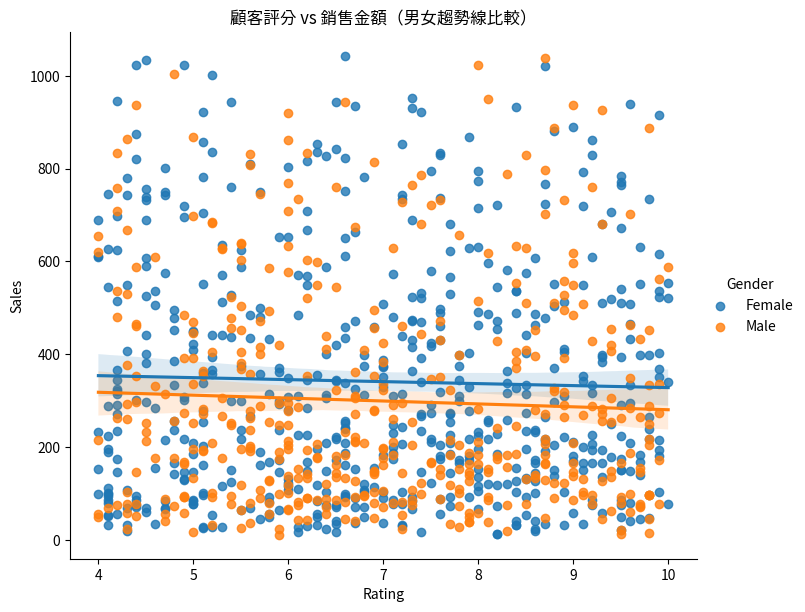

<Figure size 700x700 with 0 Axes>

In [125]:
#針對不同性別畫不同的趨勢線（例如男、女）
sns.lmplot(data=df, x='Rating', y='Sales', hue='Gender', height=6, aspect=1.2)
#height	圖表高度（單位：英吋）,aspect	長寬比例（1.2 表示比正方形略寬）
plt.title('顧客評分 vs 銷售金額（男女趨勢線比較）')
plt.show()
plt.savefig("ratingVSsale_total(gender_compare)")


In [126]:
#計算評分與金額的相關性
corr = df['Rating'].corr(df['Sales'])
print(f"評分與消費金額的皮爾森相關係數：{corr:.2f}")

#若接近 0：無關
#若接近 1 或 -1：強正／負相關

#評分與金額無明顯相關

評分與消費金額的皮爾森相關係數：-0.04


### 主題 1：每日銷售趨勢（時間序列）

         Date      Sales
0  2019-01-01  4745.1810
1  2019-01-02  1945.5030
2  2019-01-03  2078.1285
3  2019-01-04  1623.6885
4  2019-01-05  3536.6835
..        ...        ...
84 2019-03-26  1962.5130
85 2019-03-27  2902.8195
86 2019-03-28  2229.4020
87 2019-03-29  4023.2430
88 2019-03-30  4487.0595

[89 rows x 2 columns]


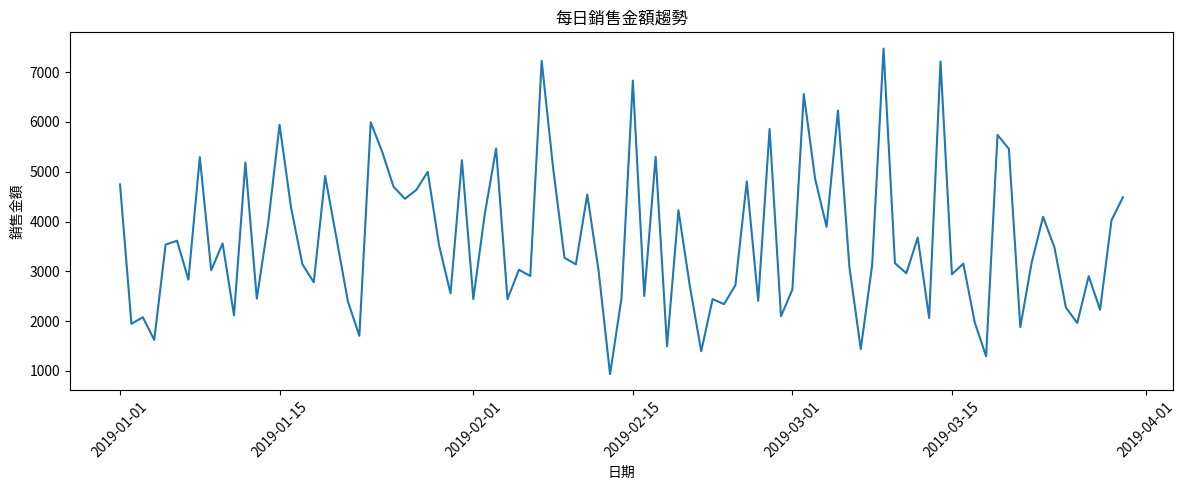

In [127]:
# 每日銷售趨勢（時間序列）
df['Date'] = pd.to_datetime(df['Date'])# 確保是日期格式，原本’Date‘是文字字串
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()# 計算每日銷售金額
# 將資料按「日期」分組，然後對每一天的 Sales 銷售金額進行加總
#groupby('Date')：按照每一天分組
#['Sales'].sum()：每組資料的 Sales 金額相加
# .reset_index()：將 groupby 結果從索引轉回成正常欄位
print(daily_sales)

plt.figure(figsize=(12,5))
sns.lineplot(data=daily_sales, x='Date', y='Sales') #畫出「每日總銷售金額」的折線圖（line plot）
plt.title('每日銷售金額趨勢')
plt.xlabel('日期')
plt.ylabel('銷售金額')
plt.xticks(rotation=45) #將 X 軸的日期文字旋轉 45 度，避免擠在一起難閱讀
plt.tight_layout() #自動調整圖表間距
plt.show()

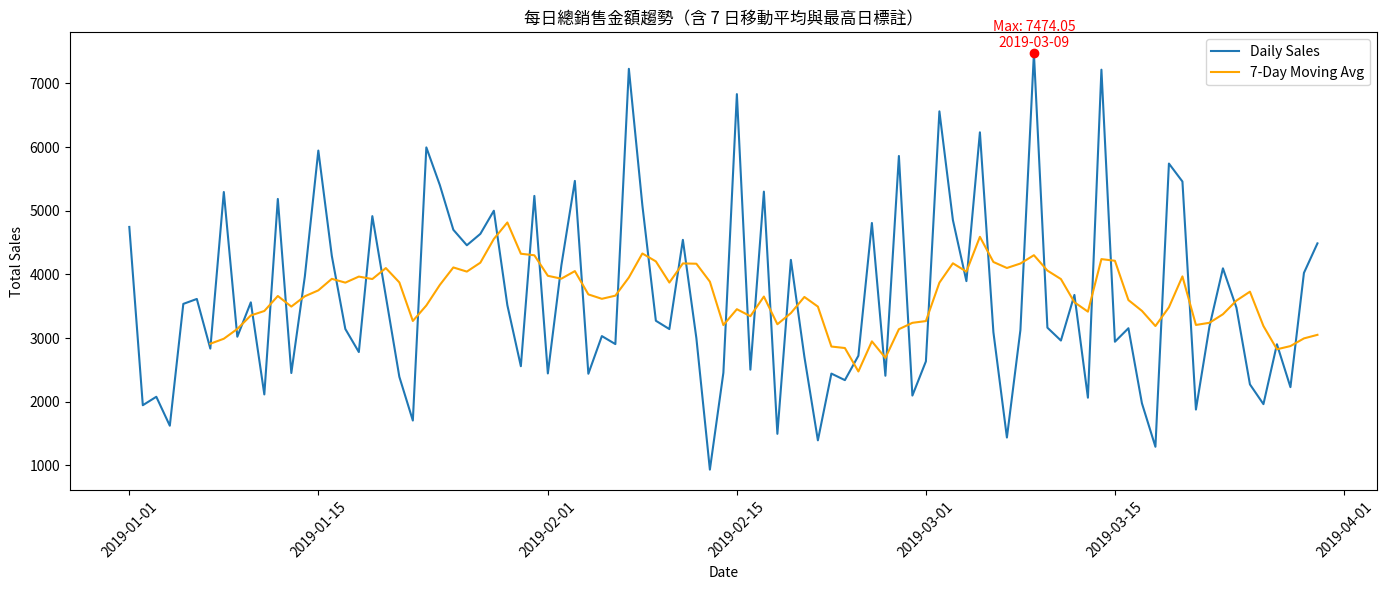

<Figure size 700x700 with 0 Axes>

In [128]:
# 計算 7 日移動平均
daily_sales['7_day_avg'] = daily_sales['Sales'].rolling(window=7).mean()
# 找出最大銷售日
max_day = daily_sales.loc[daily_sales['Sales'].idxmax()]
max_date = max_day['Date']
max_value = max_day['Sales']

# 畫圖
plt.figure(figsize=(14,6))
# 原始每日總銷售
sns.lineplot(data=daily_sales, x='Date', y='Sales', label='Daily Sales')
# 移動平均線
sns.lineplot(data=daily_sales, x='Date', y='7_day_avg', label='7-Day Moving Avg', color='orange')
# 標註最大值
plt.scatter(max_date, max_value, color='red', zorder=5)
plt.text(max_date, max_value + 100, f'Max: {max_value:.2f}\n{max_date.date()}',
         color='red', fontsize=10, ha='center')

# 格式設定
plt.title('每日總銷售金額趨勢（含 7 日移動平均與最高日標註）')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('daily_sales_trend')


根據每日銷售資料，觀察到整體銷售呈現穩定波動。
其中最高銷售發生在 {max_date.date()}，總額為 {max_value:.2f}。
為了更好地觀察趨勢，我們加入 7 日移動平均線，顯示銷售量在月初和月底皆有小幅高峰，可能與行銷活動有關。

###主題 2：城市 × 小時分佈（群體比較）

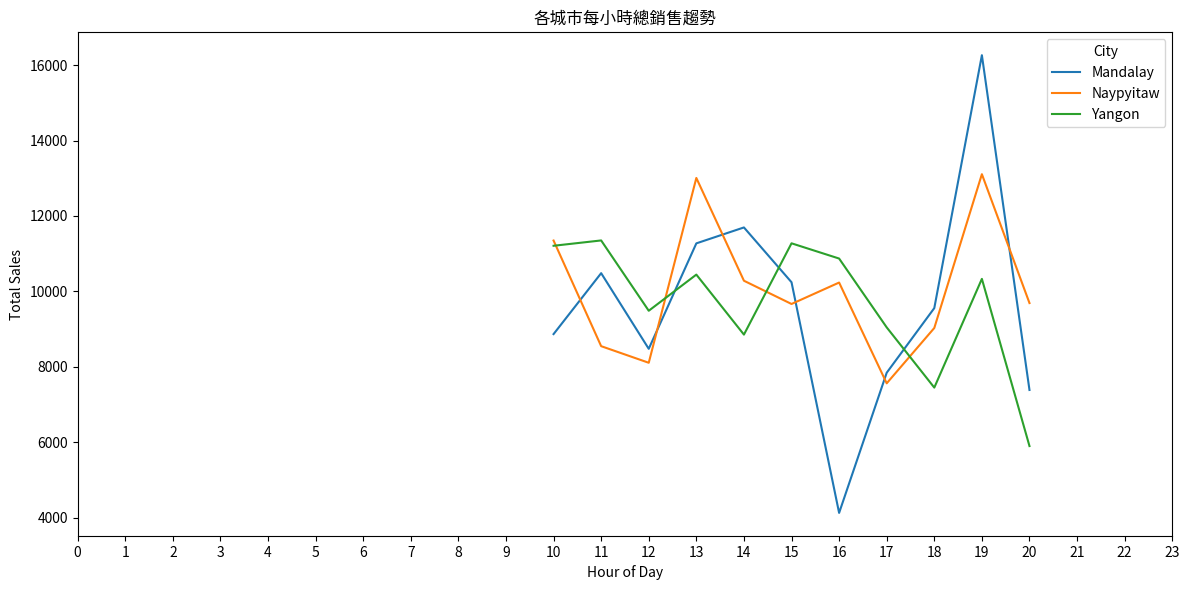

<Figure size 700x700 with 0 Axes>

In [129]:
# 確保 Hour 欄位存在
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour

# 依照 城市 × 小時 分組，計算總銷售額
hourly_city_sales = df.groupby(['City', 'Hour'])['Sales'].sum().reset_index()

# 畫圖：城市小時銷售趨勢
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_city_sales, x='Hour', y='Sales', hue='City')
plt.title('各城市每小時總銷售趨勢')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(range(0,24)) #設定 X 軸的刻度（ticks）為 0 到 23，也就是 一天 24 小時，每個小時都顯示一個數字
plt.legend(title='City') #在圖表右上角或側邊產生「圖例（legend）」，並設定圖例標題為 'City'
plt.tight_layout()
plt.show()
plt.savefig('city_hour_sales')


各城市高峰銷售時間：

Mandalay:  19:00  
Naypyitaw:  13:00 or 19:00  
Yangon:  11:00 or 15:00



###主題 3：會員 vs 非會員的購買偏好比較（群體分析）

「會員（Member）與一般顧客（Normal）對各類商品的偏好是否不同？」  
這可以幫助行銷團隊設計:
* 會員專屬品項推薦

* 非會員導入機制（針對常購商品推廣會員）

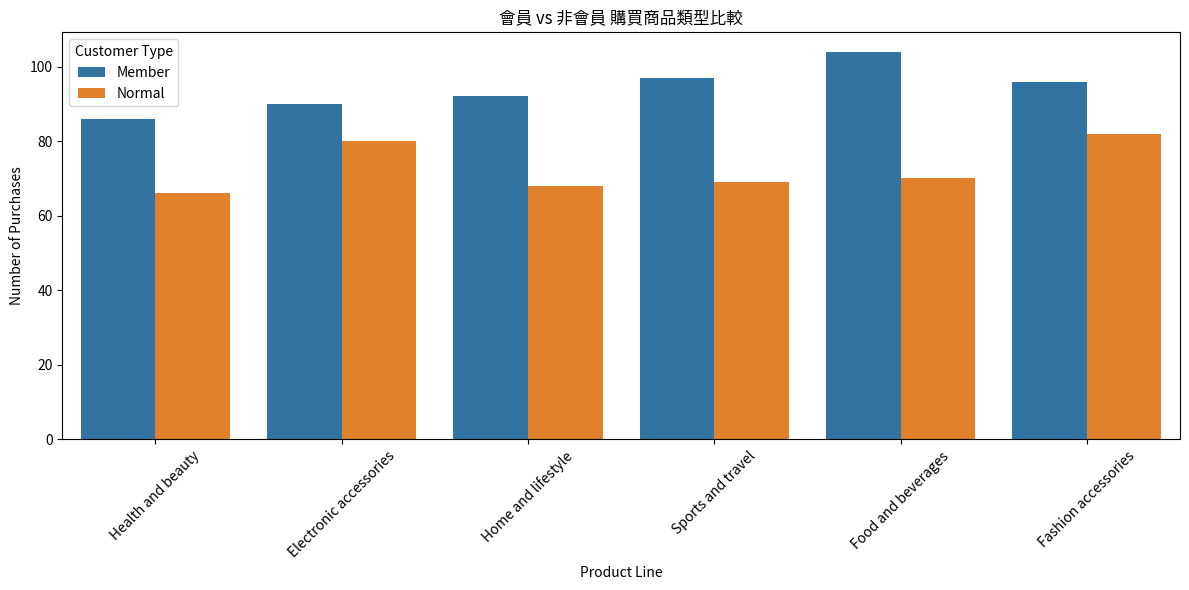

In [130]:
#群組長條圖
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Product line', hue='Customer type')
#畫出每一種類別的「出現次數」長條圖（非金額，是購買筆數）

plt.title('會員 vs 非會員 購買商品類型比較')
plt.xlabel('Product Line')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.savefig("customer_type_product.png") #存圖表
plt.show()


從圖中可以觀察到  
會員偏好"Food and beverage"  
非會員偏好"Fashion accessories"和"Eletronic accessories"  

針對會員可以推廣高價值商品，非會員可以利用他們偏好的品相誘導成為會員。

###主題 4：性別 vs 商品類別偏好分析（群體比較）

目標問題：
「男性與女性在商品類別的購買偏好是否有差異？」

有助於：

* 商品行銷策略（男生偏好電子？女生偏好美容？）

* 設計性別導向的推薦系統或折扣活動

####分析方法：countplot + hue='Gender' 群體長條圖


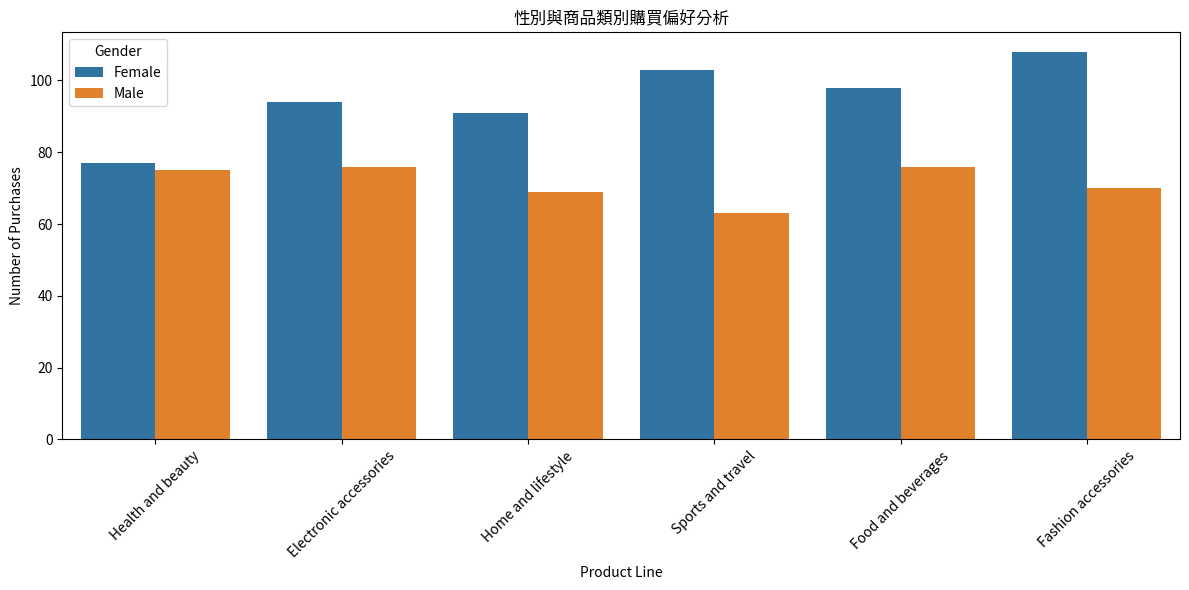

In [132]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Product line', hue='Gender')
#用購買筆數（不是金額）衡量偏好程度
#用不同顏色代表男性與女性購買筆數

plt.title('性別與商品類別購買偏好分析')
plt.xlabel('Product Line')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig("gender_productline.png") #存圖表
plt.show()


In [133]:
#交叉表（百分比分布)

# 建立交叉表
cross_tab = pd.crosstab(df['Product line'], df['Gender'], normalize='index') * 100
cross_tab = cross_tab.round(1)
'''
# normalize='index':表示要對每一列（每一個商品類別）去計算百分比。例如：「Health and beauty」總共 245 筆資料 →其中 Female 佔 160 / 245 = 約 65.3%，Male 佔約 34.7%，
加上 * 100 是把小數轉換為百分比格式（例如 0.653 → 65.3）

# .round(1):把結果四捨五入到小數點第 1 位

'''

# 顯示交叉表
print("商品類別 × 性別 百分比分布")
display(cross_tab)


商品類別 × 性別 百分比分布


Gender,Female,Male
Product line,,
Electronic accessories,55.3,44.7
Fashion accessories,60.7,39.3
Food and beverages,56.3,43.7
Health and beauty,50.7,49.3
Home and lifestyle,56.9,43.1
Sports and travel,62.0,38.0


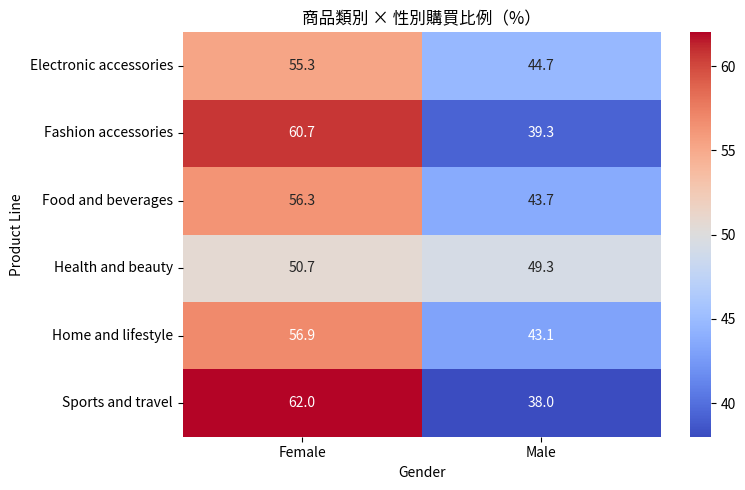

In [135]:
#熱力圖呈現
plt.figure(figsize=(8,5))
sns.heatmap(cross_tab, annot=True, cmap="coolwarm", fmt=".1f")
'''
annot=True	在每格中顯示數字（否則只有顏色）
cmap="coolwarm"	色彩樣式（冷→藍、暖→紅）
fmt=".1f"	顯示數字到小數點 1 位

'''

plt.title("商品類別 × 性別購買比例（%）")
plt.xlabel("Gender")
plt.ylabel("Product Line")
plt.tight_layout()
plt.savefig("gender_productline_heatmap.png") #存圖表
plt.show()


從圖中可以觀察：

* 女性對於「Fashion accessories」與「Sports and travel 」類別的購買筆數高於男性
* 男性對於「Electronic accessories」與「Food and beverages 」相對活躍
* 女性消費力比男性高
* 「Health and beauty」男性與女性相差不多
* 最大差距出現在「Sports and travel」（女 62%）

→ 可進一步挖掘女性對運動商品的需求與行為模式

→ 可以主打性別廣告，針對這些品類強化轉換率

→ 檢視是否超市該品類項目少或是雙方皆重視健康美容，可雙向行銷策略或是使用中性行銷語言

若有顧客年齡、會員狀態，可再進一步交叉分析「年齡 × 性別 × 品類」

### 主題 5：高價值顧客分析（High-Value Customers）
誰是店內的高價值顧客？他們有什麼特徵（性別、顧客類型、偏好商品）？
* 高消費顧客偏好什麼商品？

* 是否為會員較常出現高額消費？

* 我們能針對高價值顧客進行個人化行銷嗎？

In [136]:
# 1.先建立高價值顧客定義：單筆交易金額>300
df['High Value'] = df['Sales'] > 300 #新增一欄高價值顧客顯示T / F

# 2. 看高價值顧客比例
high_value_rate = df['High Value'].mean() * 100
print(f"高價值顧客比例：約 {high_value_rate:.1f}%")


高價值顧客比例：約 43.1%


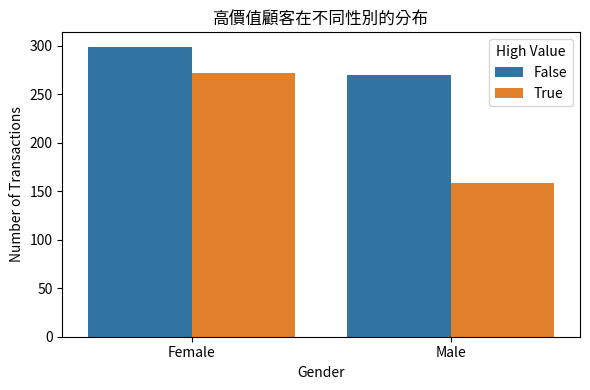

In [140]:
# 3. 高價值顧客與性別的關係
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='High Value')
#sns.countplot(data=df, x='High Value', hue='Gender')
plt.title("高價值顧客在不同性別的分布")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.savefig("high_value_gender.png") #存圖表
plt.show()

女性高價值顧客多於男性

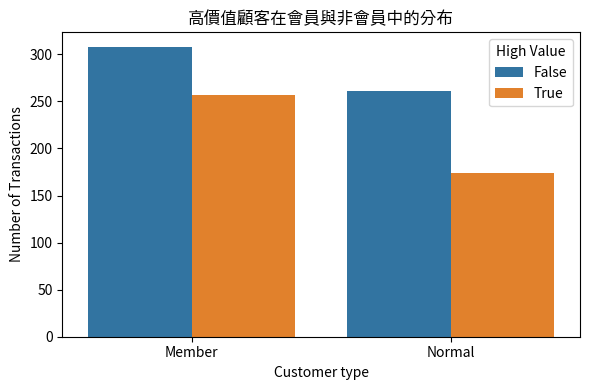

In [141]:
# 4. 高價值顧客與會員身份的關係
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Customer type', hue='High Value')
plt.title("高價值顧客在會員與非會員中的分布")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.savefig("high_value_member.png") #存圖表
plt.show()


會員族群中高價值顧客佔比顯著高於非會員

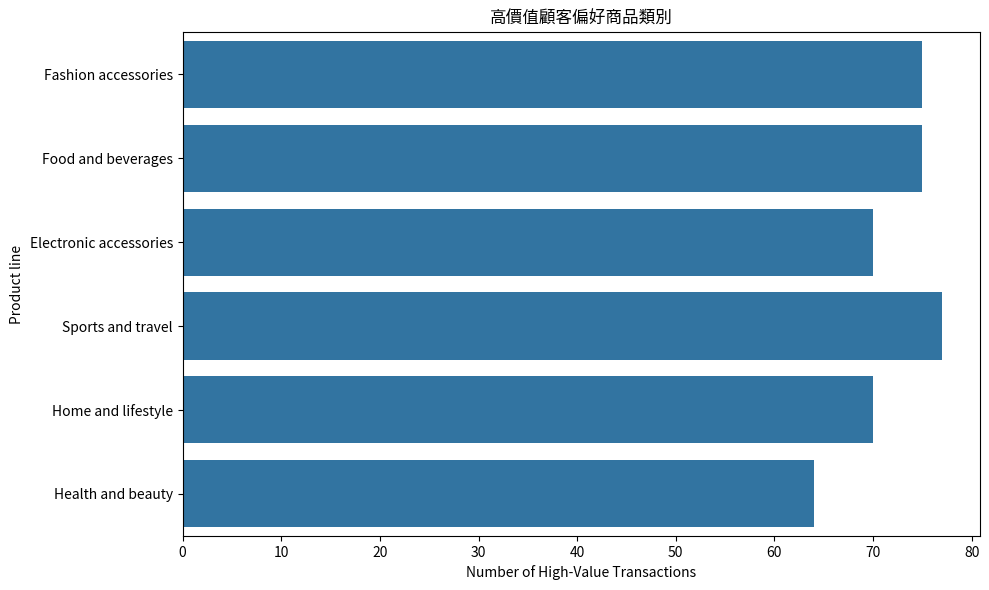

In [142]:
# 5. 高價值顧客偏好商品類別
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['High Value']], y='Product line', order=df['Product line'].value_counts().index)
plt.title("高價值顧客偏好商品類別")
plt.xlabel("Number of High-Value Transactions")
plt.tight_layout()
plt.savefig("high_value_product.png") #存圖表
plt.show()


高價值顧客集中在運動與旅遊，其次是時尚配件與食物類

觀察：

* 有43.1%的交易為高價值顧客
* 女性、會員為主，最為偏好商品為運動旅遊類
* 可針對此類顧客推出ＶＩＰ推薦計畫與高消費回饋機制，促進再購買與口碑行銷

###主題6 機器學習模型：預測顧客是否為「高價值會員」

使用 Logistic Regression（邏輯回歸）模型進行分類預測

####目標（Target）：
是否為「高價值顧客 + 會員」

In [144]:
#Label 建立（目標欄位）--> 高價值顧客 + 會員 → 1,其他 → 0
df['HighValueMember'] = ((df['Sales'] > 300) & (df['Customer type'] == 'Member')).astype(int)
#astype(int) 是把布林值轉成 1 或 0，方便做機器學習的分類模型
print(df['HighValueMember'] .head())


0    1
1    0
2    0
3    1
4    1
Name: HighValueMember, dtype: int64


In [145]:
'''
Step 1：資料預處理（建模前準備）
'''
# 1. 選擇特徵欄位（Features）

features = ['Gender', 'City', 'Product line', 'Payment']
df_model = df[features + ['HighValueMember']].copy()

In [146]:
# 2. 類別資料轉換為數值（One-hot encoding）

df_model_encoded = pd.get_dummies(df_model, drop_first=True)
#drop_first=True 是為了避免「虛擬變數陷阱」（Dummy Variable Trap）→ 每個類別變數只留 n-1 個欄位，避免共線性


In [147]:
# 3. 拆分訓練與測試集
from sklearn.model_selection import train_test_split

X = df_model_encoded.drop('HighValueMember', axis=1) #輸入特徵
y = df_model_encoded['HighValueMember'] #目標判斷是否為高價值會員

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#拆成訓練集80%,測試集20%
#random_state=42 保證每次執行拆法一致（方便重現結果）


In [148]:
'''
Step 2：建立與訓練 Logistic Regression 模型
'''
from sklearn.linear_model import LogisticRegression #LogisticRegression 是二元分類模型（預測 0 或 1）
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000) #max_iter=1000 是設定最大訓練迭代次數，避免收斂失敗
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [149]:
'''
Step 3：模型評估與結果報告
'''
y_pred = model.predict(X_test) #模型預測測試資料，產生 y_pred

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#用 confusion_matrix 和 classification_report 檢視模型準確性
#精準率（precision）/召回率（recall）/F1 分數

[[144   0]
 [ 56   0]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       144
           1       0.00      0.00      0.00        56

    accuracy                           0.72       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.52      0.72      0.60       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


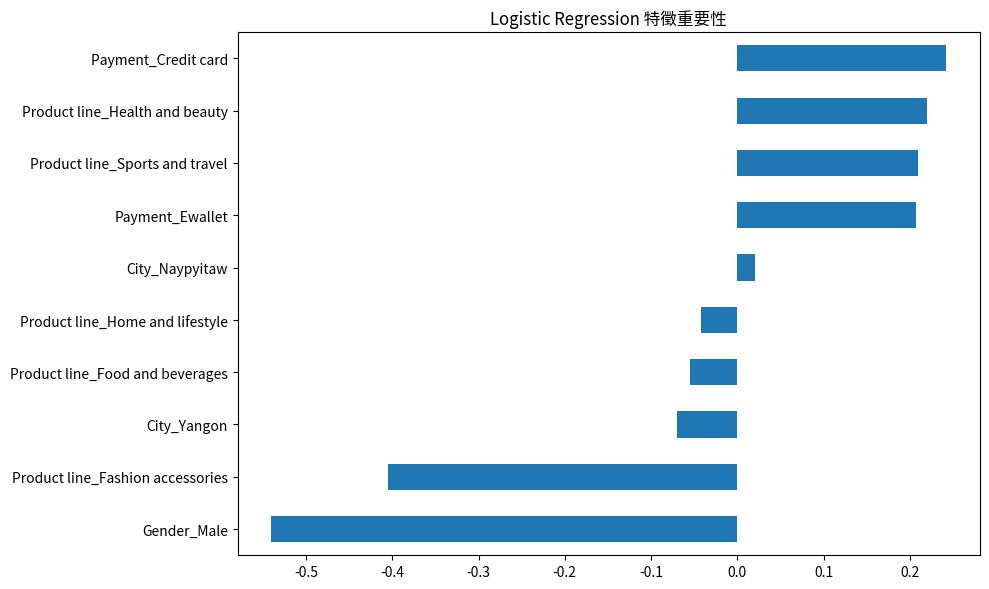

In [152]:
'''
Step 4：模型重要特徵（可視化）
'''
import seaborn as sns
import matplotlib.pyplot as plt

coef = pd.Series(model.coef_[0], index=X.columns).sort_values()
#model.coef_ 存的是每個特徵對預測結果的影響力（正負數值）
#將它轉為 Series 並畫出條形圖
#越長的條，代表對結果的影響越大
plt.figure(figsize=(10,6))
coef.plot(kind='barh')
plt.title("Logistic Regression 特徵重要性")
plt.tight_layout()
plt.savefig("logistic_regression_feature_importance_v0.png") #存圖表
plt.show()


###加入特徵工程的方法

一、加入其他變數到模型

In [153]:
''' Step 1：先新增欄位到資料集中'''

df['Hour'] = pd.to_datetime(df['Time']).dt.hour   # 小時
df['Day'] = pd.to_datetime(df['Date']).dt.day     # 日期（或週幾）


In [154]:
''' Step 2：選擇你要放進模型的變數'''
features = [
    'Gender', 'City', 'Product line', 'Payment',
    'Hour', 'Rating', 'Quantity', 'Unit price'
]

df_model = df[features + ['HighValueMember']].copy()


In [155]:
''' Step 3：數值 + 類別資料分開處理'''

# 分開類別變數與數值變數
categorical = ['Gender', 'City', 'Product line', 'Payment']
numerical = ['Hour', 'Rating', 'Quantity', 'Unit price']

# One-hot encode 類別變數
df_encoded = pd.get_dummies(df[categorical], drop_first=True)

# 組合所有變數
X = pd.concat([df_encoded, df[numerical]], axis=1)
y = df['HighValueMember']


In [163]:
print(df_encoded.head())

   Gender_Male  City_Naypyitaw  City_Yangon  Product line_Fashion accessories  \
0        False           False         True                             False   
1        False            True        False                             False   
2        False           False         True                             False   
3        False           False         True                             False   
4        False           False         True                             False   

   Product line_Food and beverages  Product line_Health and beauty  \
0                            False                            True   
1                            False                           False   
2                            False                           False   
3                            False                            True   
4                            False                           False   

   Product line_Home and lifestyle  Product line_Sports and travel  \
0                     

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 拆分訓練與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練模型
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

####二、自動化特徵選擇

#####方法 1：看邏輯回歸的「係數」來判斷重要性

/tmp/ipython-input-159-3291969256.py:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Taipei Sans TC Beta.
  plt.tight_layout()
/tmp/ipython-input-159-3291969256.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Taipei Sans TC Beta.
  plt.savefig("logistic_regression_feature_importance_v1.png") #存圖表
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Taipei Sans TC Beta.
  fig.canvas.print_figure(bytes_io, **kw)


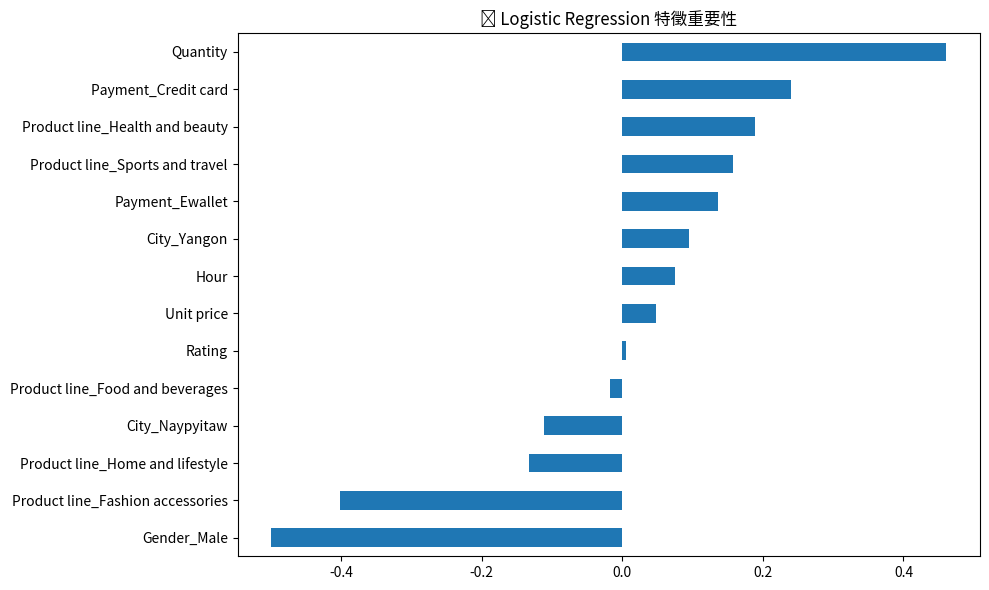

In [159]:
'''方法 1：看邏輯回歸的「係數」來判斷重要性'''
coef = pd.Series(model.coef_[0], index=X.columns).sort_values()
plt.figure(figsize=(10,6))
coef.plot(kind='barh')
plt.title("📊 Logistic Regression 特徵重要性")
plt.tight_layout()
plt.savefig("logistic_regression_feature_importance_v1.png") #存圖表
plt.show()


#####方法 2：用 Recursive Feature Elimination（RFE） 自動選擇變數


In [160]:
'''方法 2：用 Recursive Feature Elimination（RFE） 自動選擇變數'''
#用遞迴方式不斷移除表現最差的變數，直到剩下指定的個數
#可以調整 n_features_to_select=5 為想要的特徵數量

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# 建立模型
model = LogisticRegression(max_iter=1000)

# 建立 RFE 物件（選擇前 N 個變數，這裡以 5 為例）
'''之後可以用交叉驗證去做挑選最佳數量，這裡先用5'''
rfe = RFE(model, n_features_to_select=5)  # 選出最好的 5 個變數

# 在訓練資料上執行特徵選擇
rfe.fit(X, y)

# 顯示被選中的變數
selected_features = X.columns[rfe.support_]
print("✅ 最佳特徵：", list(selected_features))


✅ 最佳特徵： ['Gender_Male', 'Product line_Food and beverages', 'Product line_Health and beauty', 'Product line_Sports and travel', 'Quantity']


In [161]:
#用選出的變數再建一個新模型
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.94      0.84       144
           1       0.62      0.23      0.34        56

    accuracy                           0.74       200
   macro avg       0.69      0.59      0.59       200
weighted avg       0.72      0.74      0.70       200



In [165]:
#查看被選中的特徵名稱
selected_features = X_train.columns[rfe.support_]
print("被選中的特徵：", list(selected_features))

#rfe.support_: 回傳一組布林值，代表每個變數是否被選中

#X.columns[rfe.support_]: 得到「被選中的變數名稱」


✅ 被選中的特徵： ['Gender_Male', 'Product line_Food and beverages', 'Product line_Health and beauty', 'Product line_Sports and travel', 'Quantity']


In [164]:
#查看所有變數的排名
ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()
print("所有特徵的排名：\n", ranking)

#rfe.ranking_: 所有特徵的「排名」（1 表示最重要，越大越不重要）


所有特徵的排名：
 Gender_Male                          1
Product line_Sports and travel       1
Product line_Health and beauty       1
Product line_Food and beverages      1
Quantity                             1
Payment_Credit card                  2
Product line_Home and lifestyle      3
Hour                                 4
City_Yangon                          5
Unit price                           6
Product line_Fashion accessories     7
Rating                               8
City_Naypyitaw                       9
Payment_Ewallet                     10
dtype: int64


#####承上，RFE 加上交叉驗證（RFECV，自動挑選最佳數量n_features_to_select）

In [166]:
'''
RFE 加上交叉驗證（RFECV，自動挑選最佳數量n_features_to_select）

'''

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression(max_iter=1000)

# 自動挑出最佳特徵數量
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train, y_train)

# 最佳特徵數量
print( "RFECV 最佳特徵數量：", rfecv.n_features_)

# 被選中的特徵
best_features = X_train.columns[rfecv.support_]
print("RFECV 選中的特徵：", list(best_features))


RFECV 最佳特徵數量： 13
RFECV 選中的特徵： ['Gender_Male', 'City_Naypyitaw', 'City_Yangon', 'Product line_Fashion accessories', 'Product line_Food and beverages', 'Product line_Health and beauty', 'Product line_Home and lifestyle', 'Product line_Sports and travel', 'Payment_Credit card', 'Payment_Ewallet', 'Hour', 'Quantity', 'Unit price']


In [167]:
#重新再跑一次模型

# 用最佳特徵組成新的訓練 / 測試資料集
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

# 重新訓練模型
model_best = LogisticRegression(max_iter=1000)
model_best.fit(X_train_best, y_train)

# 預測與評估
y_pred_best = model_best.predict(X_test_best)

from sklearn.metrics import classification_report, confusion_matrix

print("✅ 混淆矩陣：")
print(confusion_matrix(y_test, y_pred_best))

print("\n✅ 模型評估報告：")
print(classification_report(y_test, y_pred_best))


✅ 混淆矩陣：
[[126  18]
 [ 27  29]]

✅ 模型評估報告：
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       144
           1       0.62      0.52      0.56        56

    accuracy                           0.78       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.77      0.78      0.77       200



混淆矩陣解釋：
* 有 126 個實際不是高價值會員的顧客被正確預測（True Negative）

* 有 29 個實際是高價值會員的顧客被正確預測（True Positive ✅）

但也有：

* 18 個正常顧客被誤判為高價值會員（False Positive）

* 27 個高價值會員被預測錯為一般顧客（False Negative）

| 項目        | 類別 0（一般會員） | 類別 1（高價值會員） | 說明                       |
| --------- | ---------- | ----------- | ------------------------ |
| Precision | 0.82       | 0.62        | 預測為這一類的人中有多少是正確的         |
| Recall    | 0.88       | 0.52        | 實際這一類的人中有多少被正確預測出來       |
| F1-score  | 0.85       | 0.56        | Precision 和 Recall 的平衡指標 |
| Support   | 144        | 56          | 測試資料中每一類有幾個樣本            |


* 整體準確率 = 78%
* 高價值會員 Recall = 0.52 → 有點偏低
→ 表示有 將近一半的高價值會員被預測錯為普通顧客
→ 對商業來說：會漏掉潛在 VIP，可能損失營收
* 高價值會員 Precision = 0.62 → 還可以接受
→ 表示當模型說「這是 VIP」時，有 62% 是對的

/tmp/ipython-input-168-1847911626.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Taipei Sans TC Beta.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Taipei Sans TC Beta.
  fig.canvas.print_figure(bytes_io, **kw)


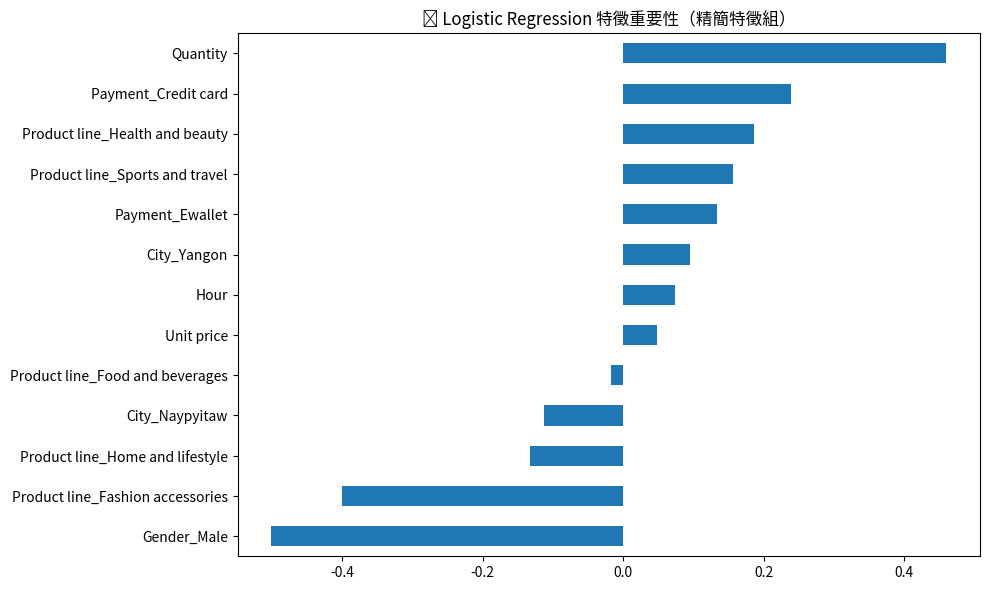

In [168]:
#畫出這 13 個特徵的影響力圖（重要性）
import pandas as pd
import matplotlib.pyplot as plt

coef = pd.Series(model_best.coef_[0], index=best_features).sort_values()

plt.figure(figsize=(10,6))
coef.plot(kind='barh')
plt.title("📊 Logistic Regression 特徵重要性（精簡特徵組）")
plt.tight_layout()
plt.show()


#####方法 3：使用 SelectKBest + 統計檢定

In [169]:
'''方法 3：使用 SelectKBest + 統計檢定'''
#使用的是變數與目標變數之間的統計關係（ANOVA F-score）來決定變數重要性

from sklearn.feature_selection import SelectKBest, f_classif

# 可以先選 10 個最好的特徵（k 可調整）
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)

# 被選中的特徵名稱
selected_kbest = X.columns[selector.get_support()] #get_support()	回傳一個布林陣列（選中的特徵為 True）
print("SelectKBest 選中的特徵：", list(selected_kbest))


SelectKBest 選中的特徵： ['Gender_Male', 'City_Naypyitaw', 'Product line_Fashion accessories', 'Product line_Food and beverages', 'Product line_Sports and travel', 'Payment_Credit card', 'Hour', 'Rating', 'Quantity', 'Unit price']


決定 k 值：

| 決定方式          | 說明                                  |
| ------------- | ----------------------------------- |
| ✂️ 固定數量       | 常見如 k=5、k=10，用於快速過濾                 |
| 📊 p-value 門檻 | 例如 p < 0.05，這樣你選到的會是統計顯著的變數         |
| 🔁 多版本模型實驗    | 觀察不同 k 值對模型表現的影響（如 accuracy）來決定最佳 k |

用 p-value 來挑選顯著變數較好


In [173]:
#自動篩出顯著變數 p < 0.05
significant_features = feature_scores[feature_scores['p-value'] < 0.05]
print("統計顯著的特徵：", list(significant_features['Feature']))


統計顯著的特徵： ['Quantity', 'Unit price', 'Gender_Male']


In [170]:
# 顯示每個特徵的 F 分數與 p-value
import pandas as pd

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-score': selector.scores_,
    'p-value': selector.pvalues_
}).sort_values(by='F-score', ascending=False)

print("特徵統計分析（依 F 分數排序）：")
display(feature_scores)

#F-score	分類用的變異數分析（ANOVA），數值越大代表越能區分高價值與否
#p-value	越小越顯著（通常 <0.05 為統計顯著）


特徵統計分析（依 F 分數排序）：


,Feature,F-score,p-value
12,Quantity,201.131964,9.984983e-42
13,Unit price,171.084817,3.373352e-36
0,Gender_Male,12.709899,3.809624e-04
10,Hour,2.467878,1.165116e-01
3,Product line_Fashion accessories,1.180760,2.774638e-01
11,Rating,1.142660,2.853494e-01
7,Product line_Sports and travel,1.076862,2.996520e-01
8,Payment_Credit card,0.900383,3.429088e-01
4,Product line_Food and beverages,0.667211,4.142208e-01
1,City_Naypyitaw,0.524963,4.689022e-01


/tmp/ipython-input-172-2462221411.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Taipei Sans TC Beta.
  plt.tight_layout()
/tmp/ipython-input-172-2462221411.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Taipei Sans TC Beta.
  plt.savefig("logistic_regression_feature_importance_v2.png") #存圖表
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Taipei Sans TC Beta.
  fig.canvas.print_figure(bytes_io, **kw)


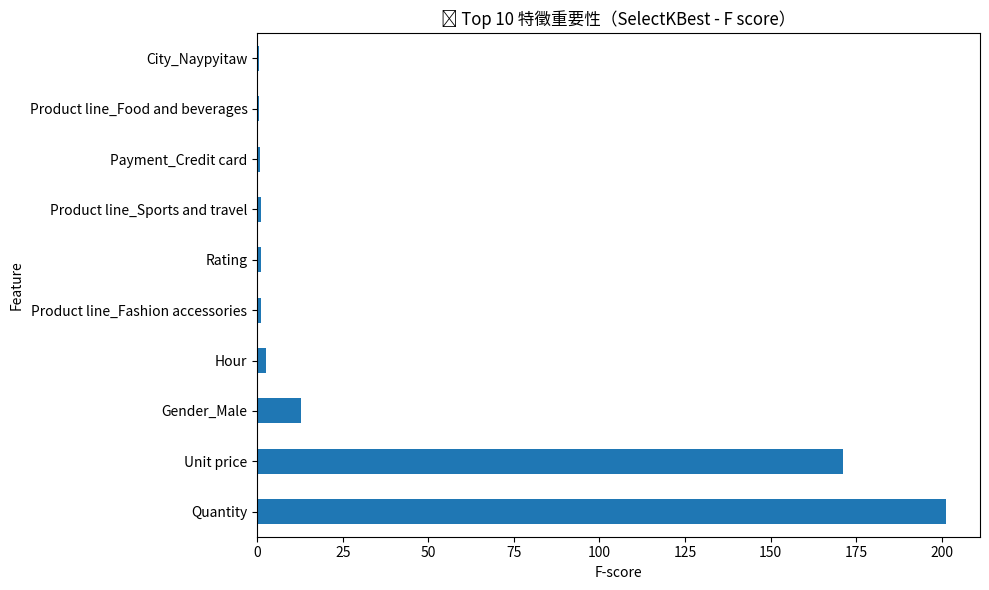

In [172]:
#畫圖來呈現 F-score
import matplotlib.pyplot as plt

top_features = feature_scores.head(10).set_index('Feature')

plt.figure(figsize=(10,6))
top_features['F-score'].plot(kind='barh')
plt.title("Top 10 特徵重要性（SelectKBest - F score）")
plt.xlabel("F-score")
plt.tight_layout()
plt.savefig("logistic_regression_feature_importance_v2.png") #存圖表
plt.show()


#### 精簡版 Logistic Regression 模型程式碼->只用3個特徵去跑


In [177]:
# ✅ 匯入套件
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# ✅ 特徵選擇（只保留三個重要特徵）
selected_features = ['Quantity', 'Unit price', 'Gender_Male']


# 先定義類別與數值變數
categorical = ['Gender']
numerical = ['Quantity', 'Unit price']

# one-hot 編碼類別變數（這裡只有 Gender）
df_encoded_simple = pd.get_dummies(df[categorical], drop_first=True)

# 合併數值變數
df_encoded_simple[numerical] = df[numerical]

# 檢查欄位
print(df_encoded_simple.columns)




Index(['Gender_Male', 'Quantity', 'Unit price'], dtype='object')


In [178]:
# 特徵與目標
X_simple = df_encoded_simple[['Quantity', 'Unit price', 'Gender_Male']]
y = df['HighValueMember']

# 分割訓練與測試資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# 建立並訓練模型
from sklearn.linear_model import LogisticRegression
model_simple = LogisticRegression()
model_simple.fit(X_train, y_train)

# 預測與評估
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model_simple.predict(X_test)
print("✅ 混淆矩陣：")
print(confusion_matrix(y_test, y_pred))
print("\n✅ 模型評估報告：")
print(classification_report(y_test, y_pred))


✅ 混淆矩陣：
[[127  17]
 [ 28  28]]

✅ 模型評估報告：
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       144
           1       0.62      0.50      0.55        56

    accuracy                           0.78       200
   macro avg       0.72      0.69      0.70       200
weighted avg       0.76      0.78      0.77       200



##### 可以不要用方法3，直接用統計顯著性去篩選

| 工具                         | 適合情境                    | 評價               |
| -------------------------- | ----------------------- | ---------------- |
| `SelectKBest`              | 你知道要篩幾個特徵（如 k=5）且想快速過濾時 | 🟢 簡潔快速          |
| `f_classif` + p-value 自行篩選 | 你希望控制「統計顯著性」與完整分析       | 🟢 更精確可控（推薦你用這個） |




In [179]:
#想更精確地用 p-value 過濾變數
from sklearn.feature_selection import f_classif

F, p = f_classif(X, y)
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-score': F,
    'p-value': p
})

# 篩選出統計顯著變數（p < 0.05）
significant_features = feature_scores[feature_scores['p-value'] < 0.05]
print("統計顯著的變數：", significant_features['Feature'].tolist())


統計顯著的變數： ['Gender_Male', 'Quantity', 'Unit price']


#### RFECV與SelectKBest 特徵選擇的差異
| 方法          | 著重什麼？                  | 優點       | 缺點               |
| ----------- | ---------------------- | -------- | ---------------- |
| RFECV       | 模型實際預測效果（交叉驗證）         | 對最終模型有幫助 | 可能選到不顯著的變數       |
| SelectKBest | 統計顯著性（F-score/p-value） | 解釋力強     | 沒考慮變數交互作用與模型實際效果 |



例如：

Product line_Sports and travel：
在統計上不顯著（p > 0.3）
但在 RFECV 中可能和 Gender、Unit price 等變數 共同作用，幫助模型更好地區分高價值顧客